## Load Data from CSVs

In [1]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

enrollments[0]

{u'account_key': u'448',
 u'cancel_date': u'2015-01-14',
 u'days_to_cancel': u'65',
 u'is_canceled': u'True',
 u'is_udacity': u'True',
 u'join_date': u'2014-11-10',
 u'status': u'canceled'}

In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

with open ("daily_engagement.csv","rb") as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)
    
with open ("project_submissions.csv","rb") as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)
    
print daily_engagement[2]
print project_submissions[2]

{u'lessons_completed': u'0.0', u'num_courses_visited': u'2.0', u'total_minutes_visited': u'53.6337463333', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-11'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'PASSED', u'completion_date': u'2015-01-20', u'creation_date': u'2015-01-20'}


## Fixing Data Types

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [8]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

def get_unique_students(data):
    unique_students = set()
    for d in data:
        unique_students.add(d["account_key"])
    return unique_students

unique_enrollments = get_unique_students(enrollments)
unique_engagements = get_unique_students(daily_engagement)
unique_submissions = get_unique_students(project_submissions)

print "Total enrollments:",len(enrollments)
print "Number of unique students' enrollments: ", len(unique_enrollments)
print "Total daily engagements: " ,len(daily_engagement)
print "Number of unique students' daily engagements: ", len(unique_engagements)
print "Total project submissions: " ,len(project_submissions)
print "Number of unique students' project submissions: ", len(unique_submissions)

Total enrollments: 1640
Number of unique students' enrollments:  1302
Total daily engagements:  136240
Number of unique students' daily engagements:  1237
Total project submissions:  3642
Number of unique students' project submissions:  743


## Problems in the Data

In [7]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
#daily engagement list element which is acct is changed to account_key 
for engagement in daily_engagement:
    engagement["account_key"] = engagement["acct"]
    del engagement["acct"]
    
print daily_engagement[0]

{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}


## Missing Engagement Records

In [9]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
weird_data = []
for enrollment in enrollments:
    if enrollment["account_key"] not in unique_engagements:
        weird_data.append(enrollment)
        
weird_data[:2]

[{u'account_key': u'1219',
  u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0),
  u'days_to_cancel': 0,
  u'is_canceled': True,
  u'is_udacity': False,
  u'join_date': datetime.datetime(2014, 11, 12, 0, 0),
  u'status': u'canceled'},
 {u'account_key': u'871',
  u'cancel_date': datetime.datetime(2014, 11, 13, 0, 0),
  u'days_to_cancel': 0,
  u'is_canceled': True,
  u'is_udacity': False,
  u'join_date': datetime.datetime(2014, 11, 13, 0, 0),
  u'status': u'canceled'}]

## Checking for More Problem Records

In [10]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
weird_data_2 = []
for enrollment in enrollments:
    if enrollment["account_key"] not in unique_engagements and enrollment["cancel_date"] != enrollment["join_date"]:
        weird_data_2.append(enrollment)
        
weird_data_2

[{u'account_key': u'1304',
  u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0),
  u'days_to_cancel': 59,
  u'is_canceled': True,
  u'is_udacity': True,
  u'join_date': datetime.datetime(2015, 1, 10, 0, 0),
  u'status': u'canceled'},
 {u'account_key': u'1304',
  u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0),
  u'days_to_cancel': 99,
  u'is_canceled': True,
  u'is_udacity': True,
  u'join_date': datetime.datetime(2015, 3, 10, 0, 0),
  u'status': u'canceled'},
 {u'account_key': u'1101',
  u'cancel_date': None,
  u'days_to_cancel': None,
  u'is_canceled': False,
  u'is_udacity': True,
  u'join_date': datetime.datetime(2015, 2, 25, 0, 0),
  u'status': u'current'}]

## Tracking Down the Remaining Problems

In [11]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_account_keys = set()
for enrollment in enrollments:
    if enrollment["is_udacity"] == True:
        udacity_test_account_keys.add(enrollment["account_key"])
print len(udacity_test_account_keys)

6


In [12]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_account = []
    for d in data:
        if d["account_key"] not in udacity_test_account_keys:
            non_udacity_account.append(d)
    return non_udacity_account

In [13]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [14]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for enrollment in non_udacity_enrollments:
    if enrollment["days_to_cancel"] == None or enrollment["days_to_cancel"] > 7:
        acc_key = enrollment["account_key"]
        enrollment_date = enrollment["join_date"]
        #Because of the line below, the most recent enrollment date is added
        if acc_key not in paid_students or enrollment_date > paid_students[acc_key]:
            paid_students[acc_key] = enrollment_date
        
print len(paid_students)

995


## Getting Data from First Week

In [15]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [16]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.
def remove_free_trials(data):
    new_data = []
    for d in data:
        if d["account_key"] in paid_students:
            new_data.append(d)
    return new_data

paid_enrollments = remove_free_trials(non_udacity_enrollments)
paid_engagements = remove_free_trials(non_udacity_engagement)
paid_submissions = remove_free_trials(non_udacity_submissions)

#It is checking whether the student visit any course in that day
for engagement_record in paid_engagements:
    if engagement_record["num_courses_visited"] > 0:
        engagement_record["has_visited"] = 1
    else:
        engagement_record["has_visited"] = 0

paid_engagement_in_first_week = []

for engagement in paid_engagements:
    account_key = engagement["account_key"]
    join_date = paid_students[account_key]
    engagement_date = engagement["utc_date"]
    if within_one_week(join_date,engagement_date):
        paid_engagement_in_first_week.append(engagement)

len(paid_engagement_in_first_week)

6919

## Exploring Student Engagement

In [17]:
from collections import defaultdict
# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.

def group_items(data,item_name):
    grouped_data = defaultdict(list)

    for record in data:
        item = record[item_name]
        grouped_data[item].append(record)
    
    return grouped_data

engagement_by_account = group_items(paid_engagement_in_first_week,"account_key")

In [18]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [19]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [20]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
## We added another statement to check whether time_delta is bigger than 0 in within_one_week function

## Lessons Completed in First Week

In [21]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.
import numpy as np

def sum_grouped_items(grouped_data,item_name):
    total_by_account = {}
    for account_key, data in grouped_data.items():
        total = 0
        for record in data:
            total += record[item_name]
        total_by_account[account_key] = total
    return total_by_account

def describe_data(total_by_account):
    total = total_by_account.values()
    print 'Mean:', np.mean(total)
    print 'Standard deviation:', np.std(total)
    print 'Minimum:', np.min(total)
    print 'Maximum:', np.max(total)

## Number of Visits in First Week

In [22]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.
engagement_by_accountKey = group_items(paid_engagement_in_first_week,"account_key")
total_days_by_accountKey = sum_grouped_items(engagement_by_accountKey,"has_visited")
describe_data(total_days_by_accountKey)

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [23]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

passed_people = set()
passing_engagement = [] 
non_passing_engagement = []

for submission in paid_submissions:
    if submission["lesson_key"] in subway_project_lesson_keys:
        if submission["assigned_rating"] == "PASSED" or submission["assigned_rating"] == "DISTINCTION":
            passed_people.add(submission["account_key"])
            
for engagement in paid_engagement_in_first_week:
    if engagement["account_key"] in passed_people:
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)
        
print "The sum of the engagements who passed the subway project: ", len(passing_engagement)
print "The sum of the engagements who didn't pass the subway project: ", len(non_passing_engagement)

The sum of the engagements who passed the subway project:  4527
The sum of the engagements who didn't pass the subway project:  2392


## Comparing the Two Student Groups

In [24]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

passed_students = group_items(passing_engagement,"account_key")
sum_passed_minutes = sum_grouped_items(passed_students,"total_minutes_visited")
print "The total_minutes_visited data belongs to the students who passed the subway project"
describe_data(sum_passed_minutes)

not_passed_students = group_items(non_passing_engagement,"account_key")
sum_not_passed_minutes = sum_grouped_items(not_passed_students,"total_minutes_visited")
print "\nThe total_minutes_visited data belongs to the students who didn't pass the subway project"
describe_data(sum_not_passed_minutes)

sum_passed_lessons = sum_grouped_items(passed_students,"lessons_completed")
print "\nThe lessons_completed data belongs to the students who passed the subway project"
describe_data(sum_passed_lessons)

sum_not_passed_lessons = sum_grouped_items(not_passed_students,"lessons_completed")
print "\nThe lessons_completed data belongs to the students who didn't the subway project"
describe_data(sum_not_passed_lessons)

sum_passed_days_visited = sum_grouped_items(passed_students,"has_visited")
print "\nThe days_visited data belongs to the students who passed the subway project"
describe_data(sum_passed_days_visited)

sum_not_passed_days_visited = sum_grouped_items(not_passed_students,"has_visited")
print "\nThe days_visited data belongs to the students who didn't pass the subway project"
describe_data(sum_not_passed_days_visited)

The total_minutes_visited data belongs to the students who passed the subway project
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645

The total_minutes_visited data belongs to the students who didn't pass the subway project
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933

The lessons_completed data belongs to the students who passed the subway project
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36

The lessons_completed data belongs to the students who didn't the subway project
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27

The days_visited data belongs to the students who passed the subway project
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7

The days_visited data belongs to the students who didn't pass the subway project
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


## Making Histograms

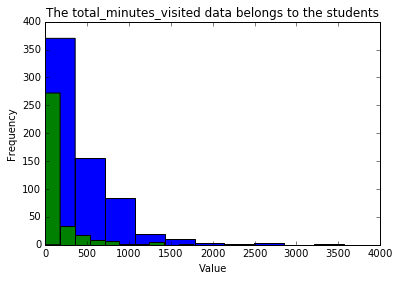

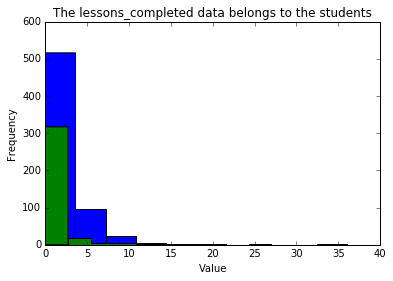

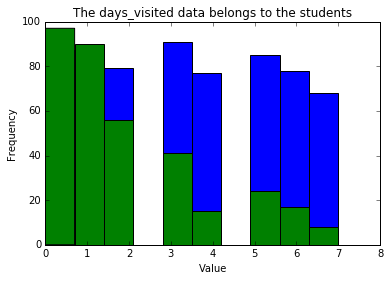

In [25]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(sum_passed_minutes.values())
plt.hist(sum_not_passed_minutes.values())
plt.title("The total_minutes_visited data belongs to the students")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig = plt.figure()

plt.hist(sum_passed_lessons.values())
plt.hist(sum_not_passed_lessons.values())
plt.title("The lessons_completed data belongs to the students")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig = plt.figure()

plt.hist(sum_passed_days_visited.values())
plt.hist(sum_not_passed_days_visited.values())
plt.title("The days_visited data belongs to the students")
plt.xlabel("Value")
plt.ylabel("Frequency")

## Improving Plots and Sharing Findings

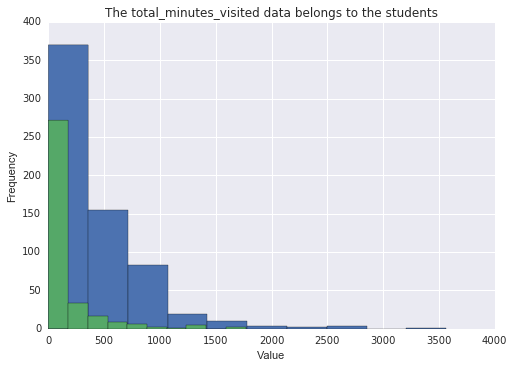

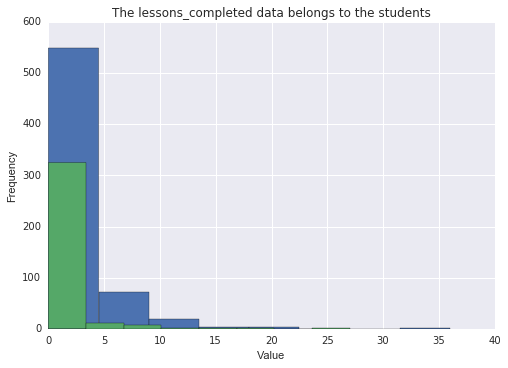

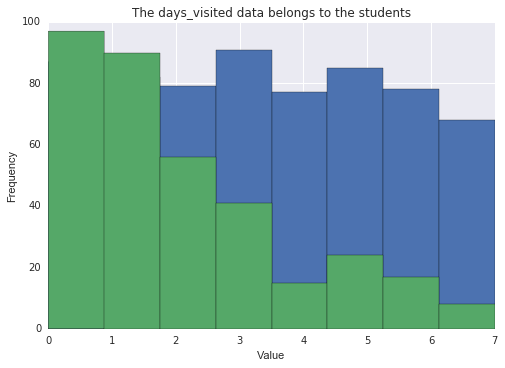

In [33]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

import seaborn as sns

plt.hist(sum_passed_minutes.values(),bins=10)
plt.hist(sum_not_passed_minutes.values(),bins=10)
plt.title("The total_minutes_visited data belongs to the students")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig = plt.figure()

plt.hist(sum_passed_lessons.values(),bins=8)
plt.hist(sum_not_passed_lessons.values(),bins=8)
plt.title("The lessons_completed data belongs to the students")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig = plt.figure()

plt.hist(sum_passed_days_visited.values(),bins=8)
plt.hist(sum_not_passed_days_visited.values(),bins=8)
plt.title("The days_visited data belongs to the students")
plt.xlabel("Value")
plt.ylabel("Frequency")